In [1]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time
from XY_diagonalisation import Plot_XY_Computations as XY_model_plotting
from functools import partial
from mpl_toolkits import mplot3d

In [41]:
XY_model.N_size=50001
with Pool(3) as p:
    Fourier_ground=partial(XY_model.Simple_Fourier_Transform ,Ground=False) # prod_x has only one argument x (y is fixed to 10)
    Data =np.array(p.map(Fourier_ground,range(1000)))

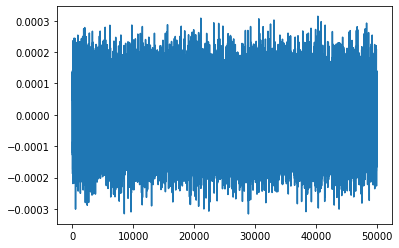

In [42]:
plt.plot(Data[:,:,0].mean(axis=0))

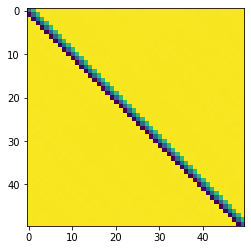

In [43]:
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=Data[:,:,0].mean(axis=0),Fourier_plus=Data[:,:,1].mean(axis=0),L=50))

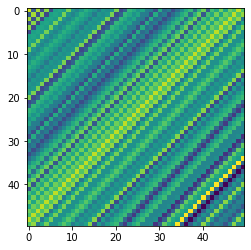

In [44]:
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[:,:,1].mean(axis=0),L=50)-XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=Data[:,:,0].mean(axis=0),Fourier_plus=Data[:,:,1].mean(axis=0),L=50))

In [45]:
A,B,C=XY_model.Compute_svd_Cov_Matrix(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=50)
A1,B1,C1=XY_model.Compute_svd_Cov_Matrix(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=50)

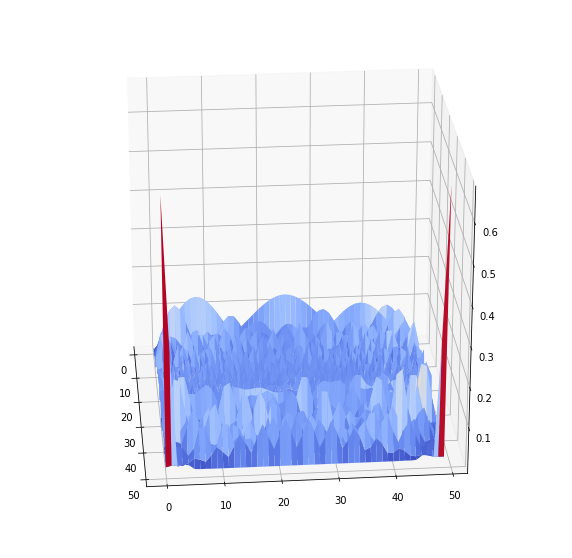

In [51]:
x=np.arange(0,50)
y=np.arange(0,50)
X,Y = np.meshgrid(x,y)
P=A**2 + C.T**2
for i in range(0,360,5):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
    ax.view_init(elev=25., azim=i)
    #plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
    #plt.close()
    plt.show()
    clear_output(wait=True)

In [52]:
%matplotlib notebook

<IPython.core.display.Javascript object>


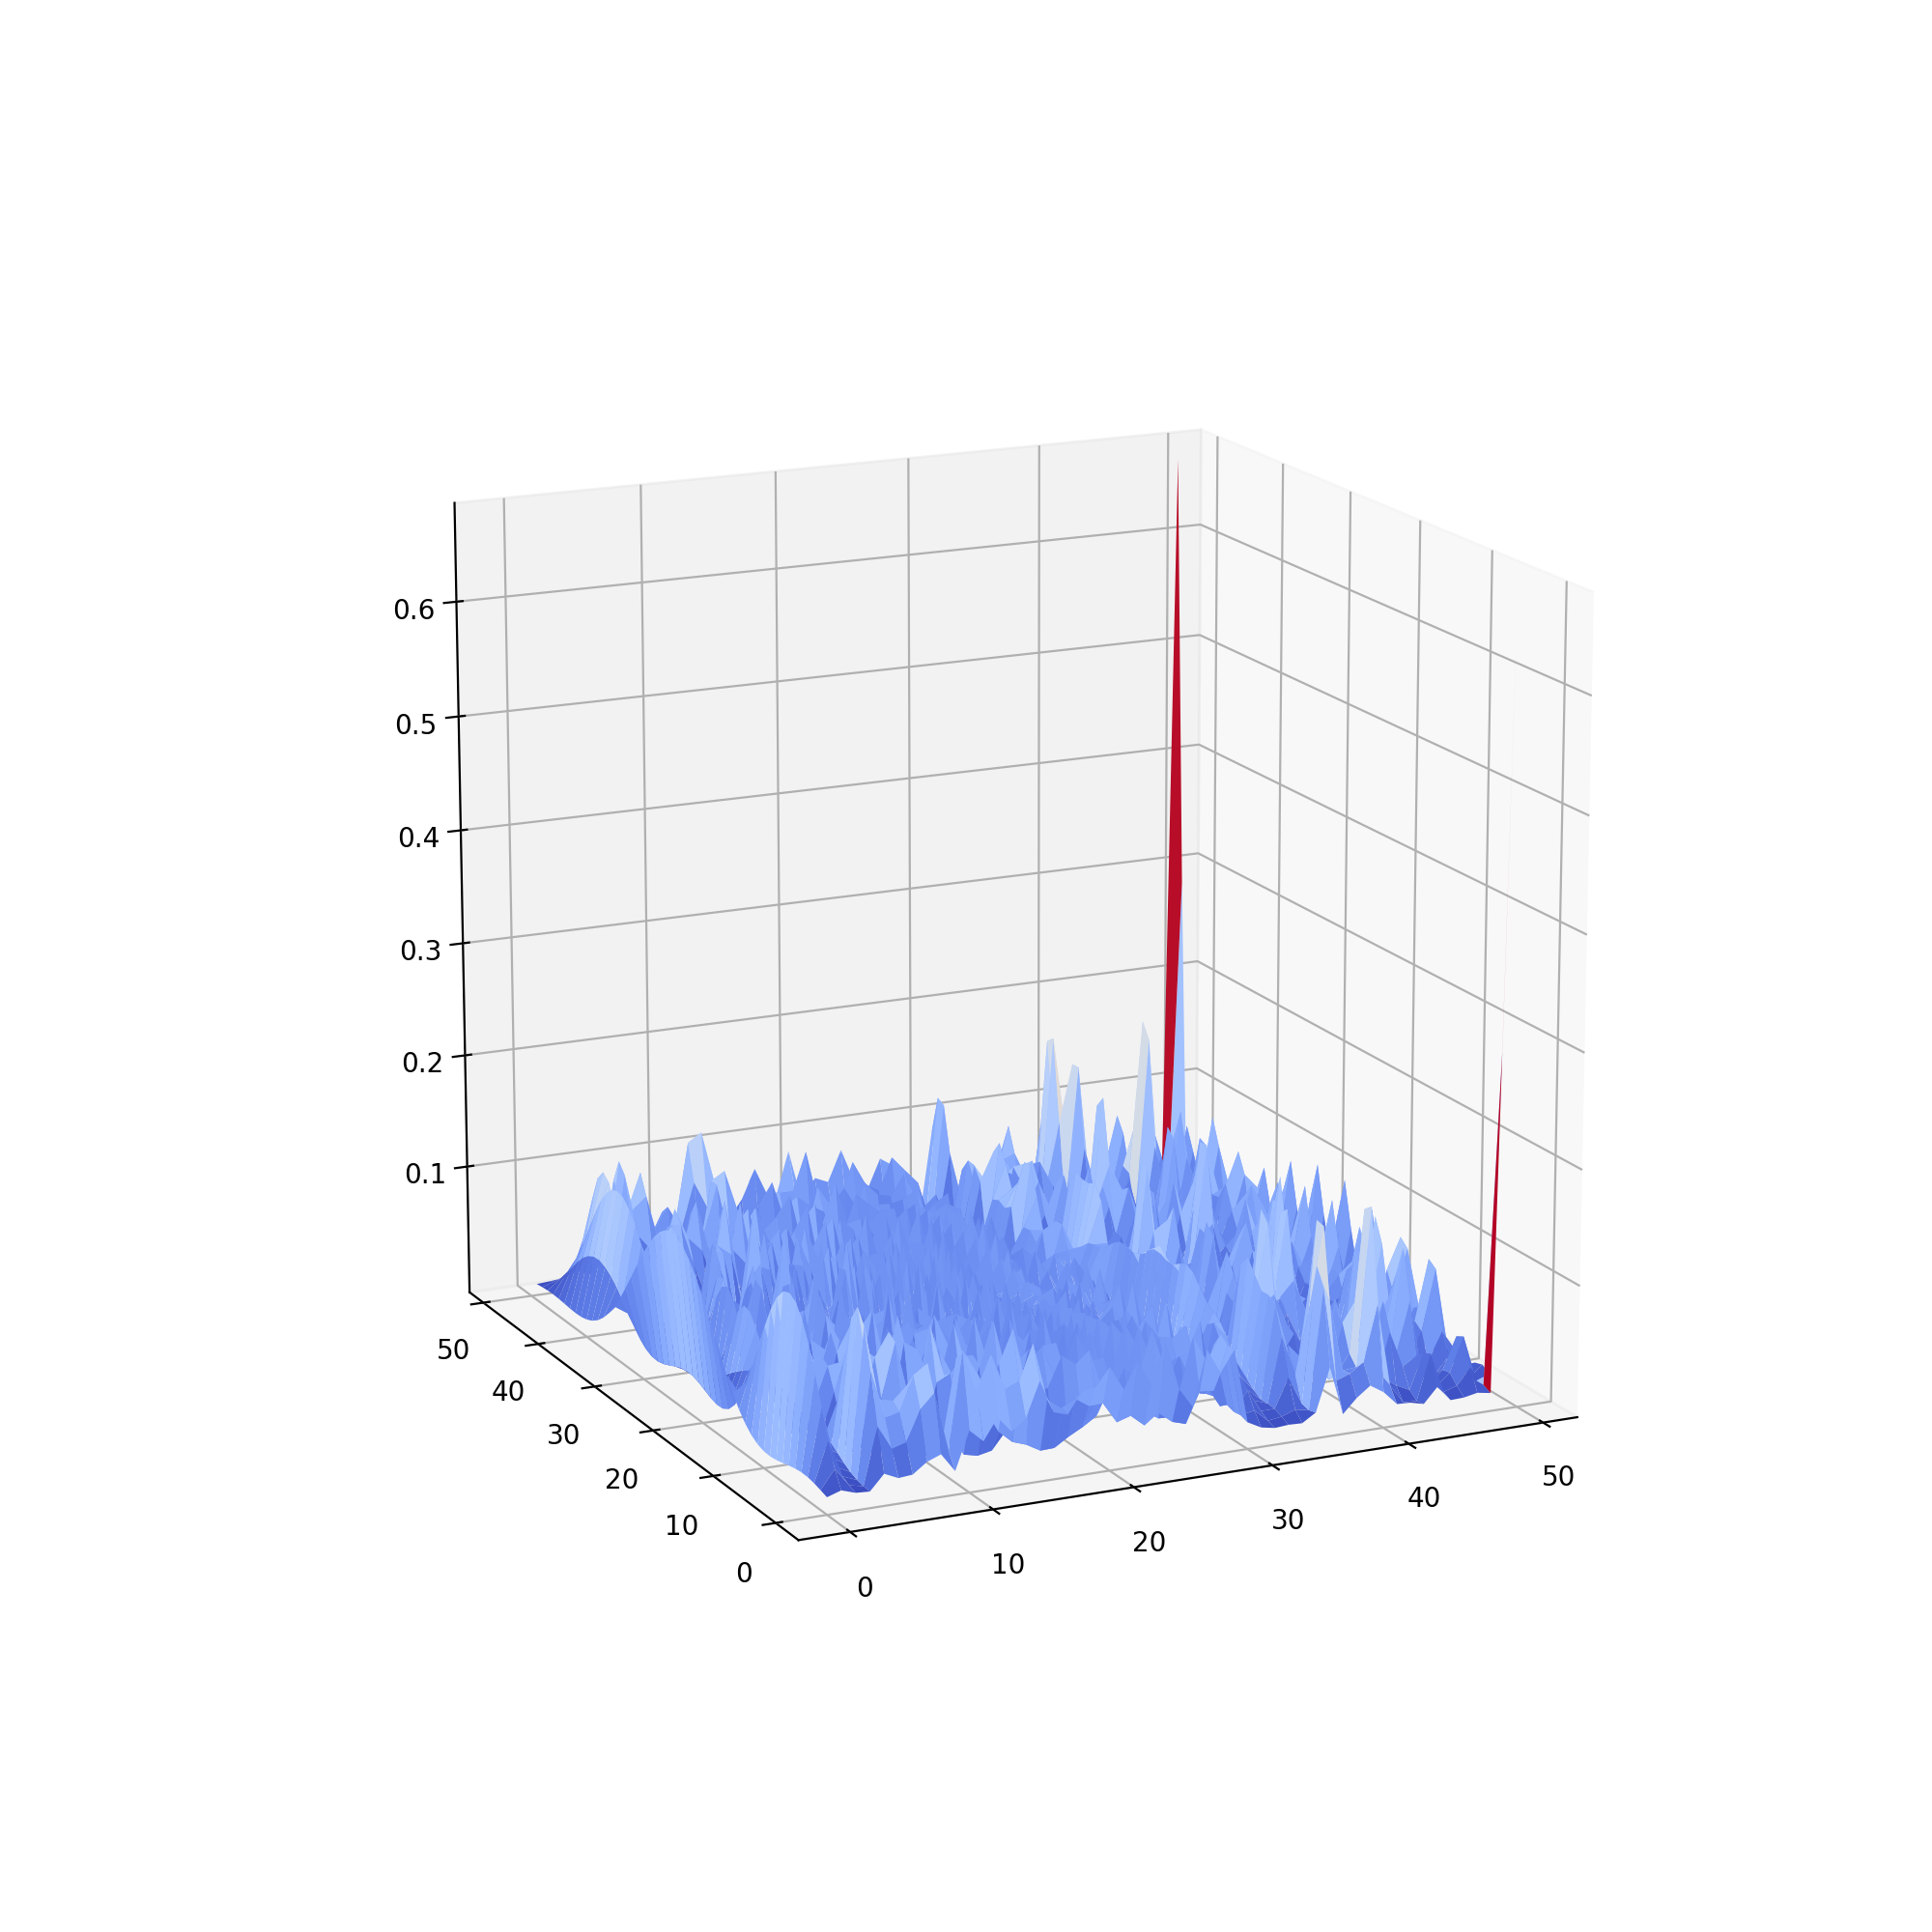

In [53]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
ax.view_init(elev=25., azim=i)
#plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
#plt.close()
plt.show()
